# Introducción a las redes neuronales

En este caso vamos a realizar una introducción a las redes neuronales, vamos a utilizar un un conjunto de datos de diabetes, estuadiamos la evolución de la enfermedad de pacientes con Diabetes Mellitus despues de un año. En este conjunto de datos vamos a caracterizar los siguientes elementos:

- edad
- sexo
- índice de masa corporal
- presión arterial promedio
- seis mediciones de suero sanguíneo:

  - Colesterol Total
  - Baja densidad de liporoteinas
  - Alta densidad de lipoproteinas
  - Triglicéridos
  - Concentración de Lamorigina
  - Glucosa

Se tienen información de 442 pacientes (m = 442). La respuesta de interés, Y, es una medida cuantitativa de la progresión de la enfermedad un año después del inicio del estudio. Los valores de Y varían entre 25 y 346

Fuente de la información: diabetes data Artículo original: Least-Angle-Regression_2004.




In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [184]:
# Los datos se encuentran el el archivo diabetes.csv. Estos se cargan en el objeto df del tipo DataFrame

df = pd.read_csv('diabetes.csv', sep ='\t')

# el objeto df contiene los 10 rasgos relevantes de los pacientes diabéticos,
# así como el progreso (Y) de la enfermedad un año después de comenzado el estudio.

In [185]:
# Se despliegan las primeras 5 muestras (rasgos, objetivo)

df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [186]:
df.tail()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220
441,36,1,19.6,71.00,250,133.2,97.0,3.00,4.5951,92,57


Las abreviaciones de las caracteristicas son las siguientes:

* AGE = Age
* SEX = Sex
* BMI = Body Mass Index (BMI)
*  BP = Mean Arterial Pressure (MAP)
*  S1 = Total Cholesterol (TC)
*  S2 = Low Density lipoproteins (LDL)
*  S3 = High Density lipoproteins (HDL)
*  S4 = Triglyceride (TG, TCH)
*  S5 = Serum Concentration of Lamorigine (LTG)
*  S6 = Glucose (GLU)
*   Y = Quantitative Measure of Diabetes Mellitus Disease Progression (QMDMDP) one year after the baseline.

In [120]:
# información estadistíca
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


## Se crean los histogramas para cada uno de los rasgos que caracteriza a los pacientes con diabetes:

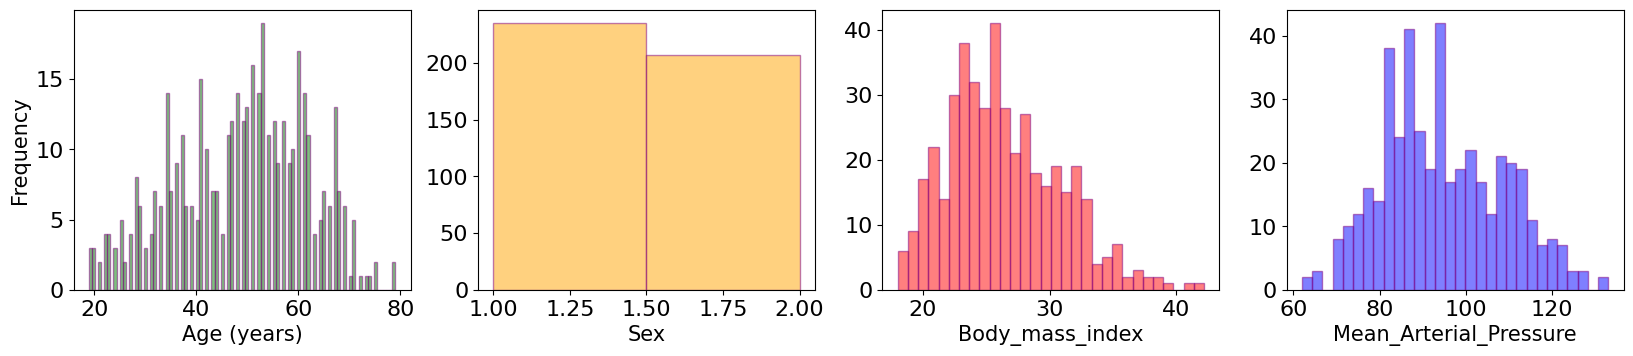

In [121]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.AGE, bins=100, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Age (years)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.SEX, bins=2, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Sex', size=15)

ax3.hist(df.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('Body_mass_index', size=15)

ax4.hist(df.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Mean_Arterial_Pressure', size=15);

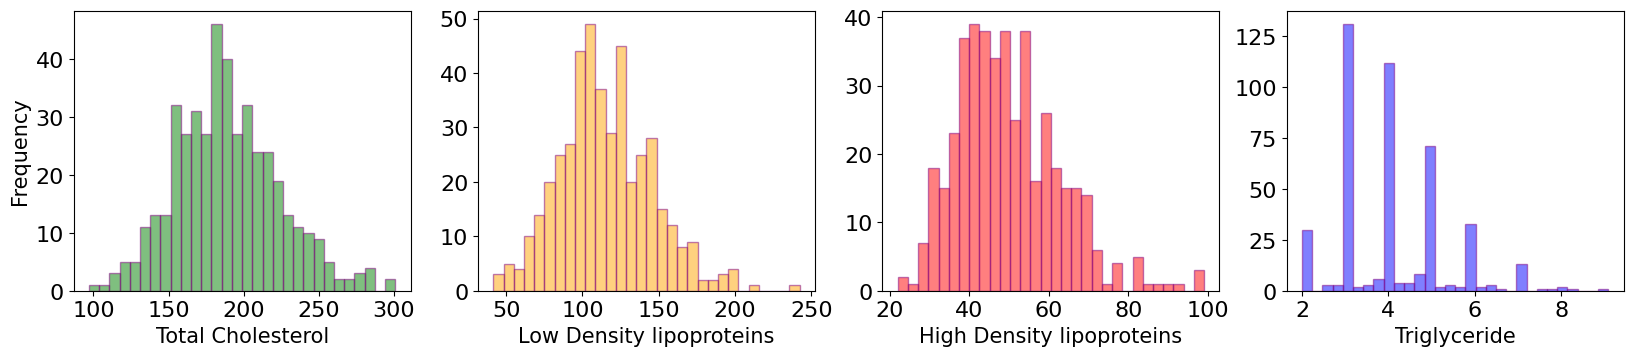

In [122]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Total Cholesterol', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Low Density lipoproteins', size=15)

ax3.hist(df.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('High Density lipoproteins', size=15)

ax4.hist(df.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('Triglyceride', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

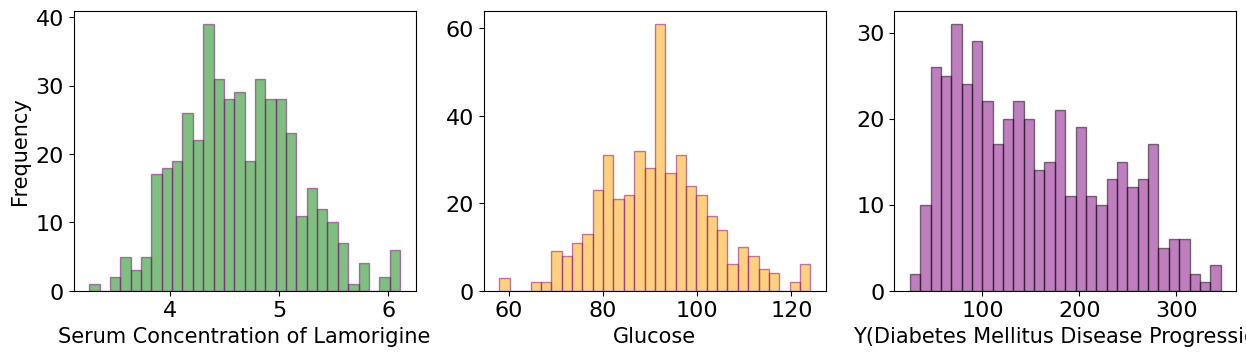

In [123]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Serum Concentration of Lamorigine', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Glucose', size=15)

ax3.hist(df.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)

## Análisis usando regresión Lineal

En modelado estadístico, es un conjunto de procesos estadísticos para estimar las relaciones entre una variable dependiente (a menudo denominada «variable de resultado») y una o más variables independientes (a menudo denominadas «predictores», «covariables» o «características»).

Más información: Análisis de regresión

Implementacion de un sistema de aprendizaje, empleando un análisis de regresion lineal

Los pasos principales para construir el sistema son:
- Definir un modelo proponiendo un algoritmo que relacione las variables X y Y.
- Inicializar las variables asociadas al modelo ω, β (pesos y biases).
- Realizar lo siguiente en cada época:
  - Calcular el costo (J).
  - Calcular el gradiente del costo respecto a las variables asociadas al modelo.
  - Actualizar los pesos y los biases empleando el algoritmo propuesto para optimización. Por ejemplo, gradiente descendente

Si se tienen $m$ muestras.
    
Para una muestra $j\in m$, con sus valores de la variable $x$, $x^{(j)}$, se genera la variable $z^{(j)}$ mediante la siguiente relación lineal:

$$z^{(j)} = w^T x^{(j)} + b = \sum_{i \in j} w_{i} x_{i}^{(j)} + b $$

$z^{(j)}$ es la combinacion lineal entre los pesos, $w_{i}$ y los valores $x^{(j)}$ + el bias b. Posteriormente esta sumatoria es transformada (activada) con una función, para generar la variable de salida $a^{(j)}$.
    
Dado que inicialmente nos interesa realizar un aprendizaje con con regresión lineal, la función de transformación es la identidad $f(z)=z$.

$$F(x^{(j)}) = a^{(j)} = f(z^{(j)})=z^{(j)}$$

Para realizar el aprendizaje, se genera una métrica definida por la función de perdida (*loss*), tambien llamada función de costo *cost*, $J$. Esta función se obtienes realizando el promedio, sobre todas las $m$ muestras, de la diferencia al cuadrado entre el valor ($y^{(j)}$) de la muestra $j$ y el valor de la función $F(x^{(j)})$.  

$$ J = \frac{1}{m} \sum_{j=1}^m (y^{(j)} -F(x^{(j)}))^2$$


In [124]:
# para evitar cualquier posible correlación en las muestras se vuelven a ordenar de manera aleatoria
df = df.sample(frac=1)

In [125]:
# para observar las dimensiones del conjunto con que estamos trabjando usamos shape
print(df.shape)

(442, 11)


In [126]:
print(len(df.values[:,:]))

442


In [127]:
# se divide el cjto original para entrenar el modelo y posteriormente para hacer pruebas
test_ratio = 0.2 # usamos en esta ocasión una división de 80% / 20%

train_ratio = int((1.0-test_ratio)*len(df.values[:,:]))

df_train = df.iloc[0:train_ratio,:]
df_test  = df.iloc[train_ratio:,:]

In [128]:
print(df_train.shape)
print(df_test.shape)

(353, 11)
(89, 11)


Para trabajar con los modelos de aprendizaje,es adecuado que todas las variables tengan el mismo orden de magnitud. Por ello, se normalizan sus valores en las muestras que se emplearán en el entrenamiento, tanto los rasgos (X) y las variables objetivo (Y):

$$x_{i,norm} = \dfrac{x_{i}-\mu}{\sigma}$$
    
$$y_{i,norm} = \dfrac{y_{i}-\mu}{\sigma}$$

In [129]:
df_train_norm = (df_train - df_train.mean()) / df_train.std()
df_train_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
90,0.256657,-0.967935,-0.566173,-0.873530,-0.661156,-0.987545,1.590997,-1.648991,-1.540322,0.243919,-0.691147
314,-0.509192,-0.967935,0.846995,-0.294458,-0.218910,-0.029068,-0.048884,-0.077060,-0.269044,-0.844849,-0.055998
130,-1.351627,1.030200,2.051664,2.166601,-0.071494,-0.110641,-0.123424,-0.077060,0.460863,1.604878,1.590203
246,0.869337,-0.967935,-0.705173,-1.331722,1.697490,1.099351,1.143757,-0.234253,0.933167,-1.298502,-0.950391
148,-1.275042,1.030200,0.314161,-0.439226,0.783515,1.038172,0.398356,-0.077060,-0.666896,-0.028273,-0.717071


\* Nota importante: La normalización de las muestras de prueba se realiza con los valores de μ y σ obtenidos con las muestras empleadas para el entrenamiento

In [130]:
df_test_norm = (df_test - df_train.mean()) / df_train.std()
df_test_norm.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
255,0.026902,-0.967935,-1.423341,-0.149689,-0.159944,-0.430133,0.845597,-0.863026,-0.087625,0.153188,0.021775
350,-0.585777,1.030200,1.287163,2.238985,0.252819,-0.389347,-0.048884,-0.077060,1.463764,2.965838,1.188374
128,-1.121872,-0.967935,-1.353841,-0.583994,-0.130460,-0.117439,0.621977,-0.863026,-0.666896,-1.570694,-0.470789
248,-0.892117,-0.967935,1.009162,1.225608,2.729397,2.771588,-0.496124,2.280836,1.330442,0.879033,1.382808
182,0.945922,1.030200,0.105661,1.153224,1.373176,1.928672,-0.794284,1.494871,0.310611,-0.209734,-0.172658


Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

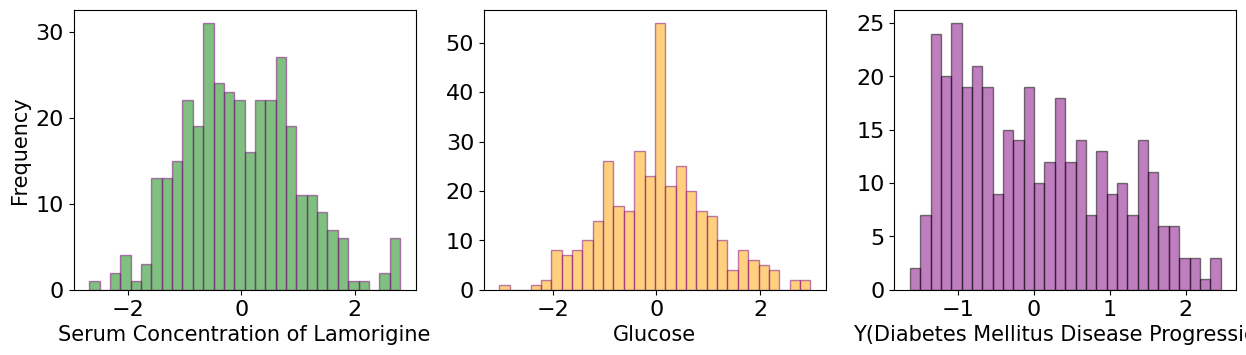

In [131]:
plt.figure(figsize=(15,8))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('Serum Concentration of Lamorigine', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('Glucose', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)

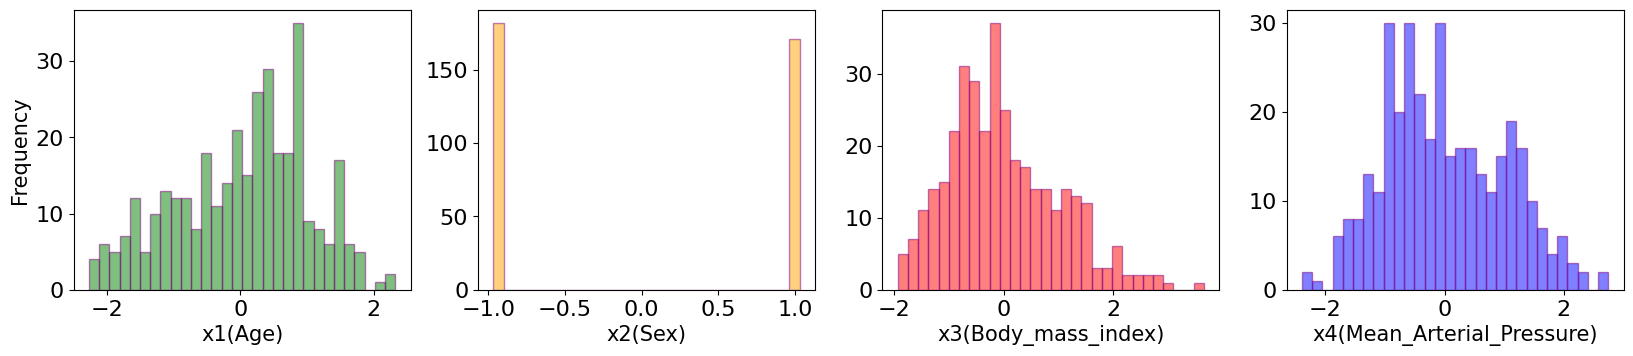

In [132]:
# Histogramas de las variables que se emplearán en el entrenamiento:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.AGE, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x1(Age)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.SEX, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x2(Sex)', size=15)

ax3.hist(df_train_norm.BMI, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x3(Body_mass_index)', size=15)

ax4.hist(df_train_norm.BP, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x4(Mean_Arterial_Pressure)', size=15);

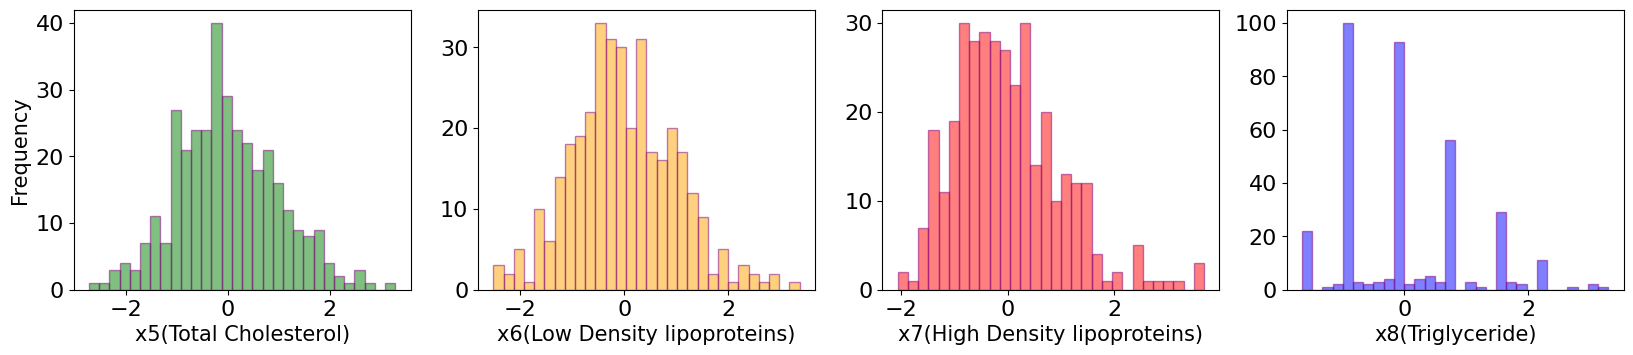

In [133]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,4,1)
ax2 = plt.subplot(2,4,2)
ax3 = plt.subplot(2,4,3)
ax4 = plt.subplot(2,4,4)

ax1.hist(df_train_norm.S1, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x5(Total Cholesterol)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S2, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x6(Low Density lipoproteins)', size=15)

ax3.hist(df_train_norm.S3, bins=30, color='red',edgecolor='purple', alpha=0.5)
ax3.set_xlabel('x7(High Density lipoproteins)', size=15)

ax4.hist(df_train_norm.S4, bins=30, color='blue',edgecolor='purple', alpha=0.5)
ax4.set_xlabel('x8(Triglyceride)', size=15);

Text(0.5, 0, 'Y(Diabetes Mellitus Disease Progression)')

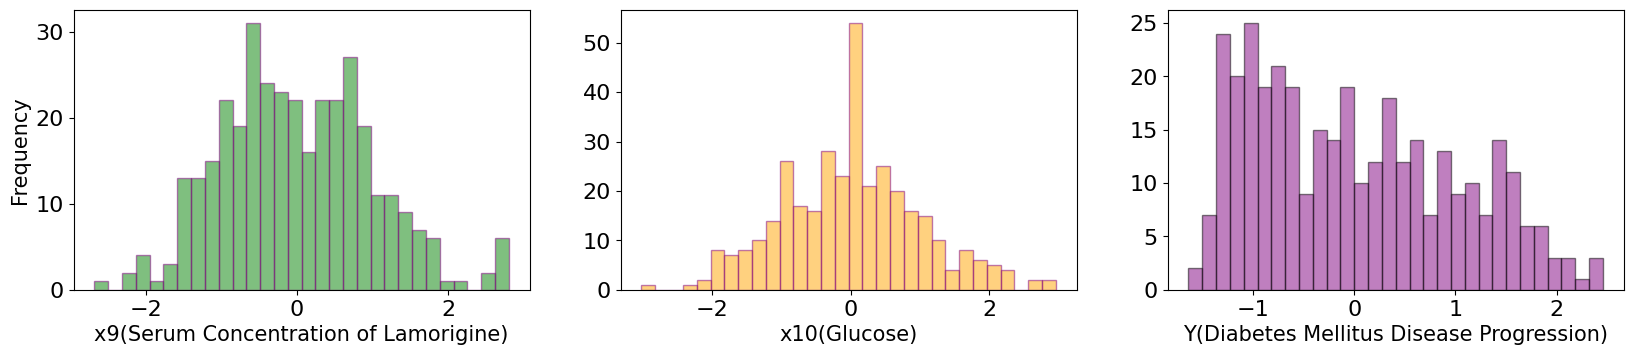

In [134]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)

ax1.hist(df_train_norm.S5, bins=30, color='green',edgecolor='purple', alpha=0.5)
ax1.set_xlabel('x9(Serum Concentration of Lamorigine)', size=15)
ax1.set_ylabel('Frequency', size=15)

ax2.hist(df_train_norm.S6, bins=30, color='orange',edgecolor='purple', alpha=0.5)
ax2.set_xlabel('x10(Glucose)', size=15)

ax3.hist(df_train_norm.Y, bins=30, color='purple',edgecolor='black', alpha=0.5)
ax3.set_xlabel('Y(Diabetes Mellitus Disease Progression)', size=15)

In [135]:
x_train = df_train_norm.values[:,:-1] # toma todas las muestras y no incliuye la ultima columna
y_train = df_train_norm.values[:,-1:] # tomo la todas las muestras y la ultima col
print(type(x_train), type(y_train))
print(x_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(353, 10)
(353, 1)


In [136]:
x_test = df_test_norm.values[:,:-1]
y_test = df_test_norm.values[:,-1:]
print(type(x_test), type(y_test))
print(x_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(89, 10)
(89, 1)


In [137]:
train_x = x_train.T
test_x = x_test.T

train_y = y_train
test_y =  y_test

In [138]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(10, 353)
(353, 1)
(10, 89)
(89, 1)


In [139]:
train_x[:,1:3]

array([[-0.5091923 , -1.35162678],
       [-0.96793533,  1.03020017],
       [ 0.84699545,  2.05166371],
       [-0.29445764,  2.16660128],
       [-0.21890967, -0.07149435],
       [-0.02906839, -0.1106409 ],
       [-0.04888392, -0.12342397],
       [-0.07706025, -0.07706025],
       [-0.26904418,  0.4608631 ],
       [-0.84484861,  1.60487822]])

Se inicializan los parámetros de la función, $F(X)$ que define la relación entre X y Y.


Debido a que las variables X y Y fueron normalizadas a distribuciones con un deviación estándard de 1, los valores de los parámetros $w$ se inicializan con valores pequeños, mientras que el bias se inicializa con cero.

In [140]:
def initialize_params(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [141]:
#Testing the function initialize_params (dim)

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[-0.05223281]
 [-0.00869037]
 [ 0.06390346]
 [-0.08460089]
 [-0.01462677]
 [-0.06326186]
 [-0.01033267]
 [ 0.08011457]
 [ 0.08267843]
 [-0.0895334 ]]
b = 0


Una vez inicializados los pesos y el bias, se calcula la función de costo, y sus derivadas parciales respecto a cada uno de los pesos $w_{i}$ y el bias $b$. Estas derivadas se emplean para proponer nuevos valores tanto para los pesos como para el bias.

La funcion *propagate( )* calcula la función de costo y su gradiente:

- Se tiene X $$ $$
- Se calcula $$A = (w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$$ $$ $$
- Se calcula la función de costo: $$J = \frac{1}{m}\sum_{i=1}^m(y^{(i)} -F(x^{(i)}))^2$$


Las derivadas de la funcion de costo respecto a los pesos $ w_k$ y el bias $ b$ son:


$$ \frac{\partial J}{\partial w_k} = \frac{1}{m}X(A-Y)^T$$ $$ $$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (F(x^{(i)})-y^{(i)}))$$

In [142]:
#Función para transformar los efectos no lineales. En el presente caso se considera un modelo completamente
#lineal. Por ello la función es la identidad.

def identity(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- z
    """
    s = 1.0 * z

    return s

In [143]:
def propagate(w, b, X, Y,X_val,Y_val):

    m = X.shape[1]
    m_val = X_val.shape[1]

    A = identity(np.dot(w.T, X)+b)
    A_val = identity(np.dot(w.T,X_val)+b)

    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)

    dw = (1/m)*np.dot(X, (A-Y).T)

    db = (1/m)*np.sum(A-Y)


    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    cost_val = np.squeeze(cost_val)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost, cost_val

Actualizacion de los pesos y el bias

Para monitorear el aprendizaje, las muestras para el aprendizaje se dividen en dos grupos:

El 90% de ellas se emplean para realizar el aprendizaje y el 10% restante para evaluar, "validar", la calidad del aprendizaje.

La función optimize( ) actualiza los pesos ω y el bias $b$ usando el método de gradiente descendente.

Se calcula la función de costo para las muestras empleadas en el entrenamiento y para las asignadas a la validación.

Los pesos  y el bias  son modificados en cada época hasta que la función de costo  llega a su valor mínimo.

Los pesos y el bias  se actualizan mediante la siguientes relaciones:

Los pesos $ w_{k} $ y el bias $b$ se actualizan mediante la siguientes relaciones: $$ $$ $$ w_{k} := w_{k} - \alpha \frac{\partial J}{\partial w_{k}} $$

$$ b := b - \alpha \frac{\partial J}{\partial b} $$ $$ $$ $ \alpha $ es el hyperparámetro que define la relación de aprendizaje.

In [144]:
def optimize(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):

    costs = []
    costs_val = []

    for i in range(epochs):


        grads, cost, cost_val = propagate(w, b, X, Y,X_val,Y_val)

        dw = grads["dw"]
        db = grads["db"]

        w = w-learning_rate*dw
        b = b-learning_rate*db

        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after epoch %i: %f %f" %(i, cost, cost_val))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs, costs_val


Una vez que se encuentran los valores de los pesos $w$ y del bias $b$ que minimizan la función de costo, la función, $F(X)$ que se genera con estos valores se emplea para inferir valores de Y asociados a las muestras de prueba, los cuales se comparan con los valores Y conocidos de estas muestras.

La función `predic()` calcula $F(X)=w ^ T X + b$ empleando los valores de $w$ y $b$ para los cuales el costo es mínimo.

In [145]:
def predict(w, b, X):

    w = w.reshape(X.shape[0], 1)

    A = identity(np.dot(w.T, X)+b)

    return A

Para calcular la precision del modelo, a manera de ejemplo, se usa el error cuadático medio, MSE: $$ $$

$$100-MSE*100$$

es decir

$$100-(\dfrac{1}{m_{test}}\sum_{i}^{m_{test}} (y^{(i)}-a^{(i)})^2)*100$$

In [149]:
def model(X_train, Y_train, val_ratio, epochs = 2000, learning_rate = 0.5, print_cost = False):


    train_ratio = int((1-val_ratio)*X_train.shape[1])
    X_val = X_train[:,train_ratio:]
    Y_val = Y_train[:,train_ratio:]

    X_train = X_train[:,:train_ratio]
    Y_train = Y_train[:,:train_ratio]

    print("Train",X_train.shape,Y_train.shape)
    print("val",X_val.shape,Y_val.shape)

    # 1. inicializacion de parametros
    w, b = initialize_params(X_train.shape[0])

    # 2. y 3. Actualizacion de parametros
    parameters, grads, costs, costs_val = optimize(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)

    w = parameters["w"]
    b = parameters["b"]

    # 4. Predicciones
    Y_prediction_val = predict(w, b, X_val)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))


    d = {"costs": costs, "costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "epochs": epochs}

    return d

In [148]:
print(train_x.shape[1])

353


In [165]:
epochs = 2000
learning_rate = 0.02
val_ratio = 0.2
d = model(train_x, train_y.T, val_ratio=val_ratio, epochs = epochs,
          learning_rate = learning_rate, print_cost = False)

Train (10, 282) (1, 282)
val (10, 71) (1, 71)
train accuracy: 48.51230345424622 %
test accuracy: 48.38873513475003 %


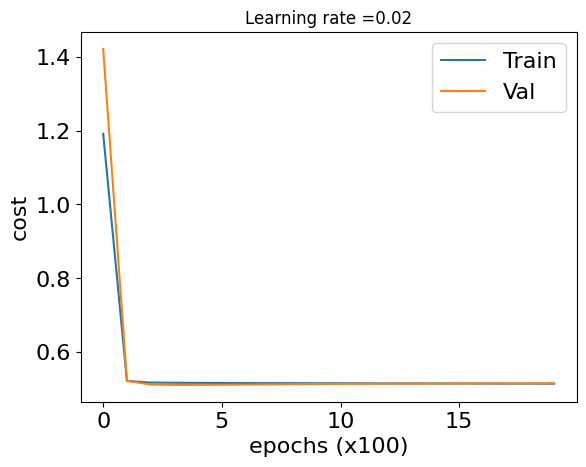

In [166]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])

plt.plot(costs)
plt.plot(costs_val)
plt.ylabel('cost', size=16)
plt.xlabel('epochs (x100)', size=16)
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

learning rate is:  0.01
Train (10, 317) (1, 317)
val (10, 36) (1, 36)
train accuracy: 47.77642095495259 %
test accuracy: 58.664416556725755 %

-------------------------------------------------------

learning rate is:  0.005
Train (10, 317) (1, 317)
val (10, 36) (1, 36)
train accuracy: 47.64680252461871 %
test accuracy: 58.57482432492681 %

-------------------------------------------------------

learning rate is:  0.001
Train (10, 317) (1, 317)
val (10, 36) (1, 36)
train accuracy: 47.212912841613964 %
test accuracy: 58.66225673438833 %

-------------------------------------------------------



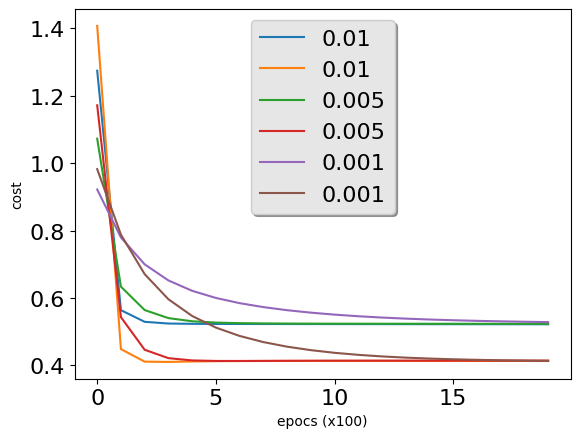

In [167]:
learning_rates = [0.01, 0.005, 0.001]
val_ratio = 0.1
models = {}
for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model(train_x, train_y.T, val_ratio=val_ratio, epochs = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('epocs (x100)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

## Non-Linear Regression Analysis

Para nuestro nuevo sistema de aprendizaje, la función $F(X)$ ya no varía linealmente con X. La relación (2) de las siguientes ecuaciones ya no es válida:
    
$$z^{(j)} = w^T x^{(j)} + b = \sum_{i \in j} w_{i} x_{i}^{(j)} + b $$
    
$$F(x^{(j)}) = a^{(j)} = f(z^{(j)})=z^{(j)}$$


Para tomar en cuenta la no linealidad, la función $f(z)=z$ se cambia por una función ligeramente no lineal alrededor de cero. Esto se logra empleando en su lugar una función del tipo sigmoid, por ejemplo $f(z)=tanh(z)$. Con este cambio, la ecuación (2) se transforma entonces en: $$ $$
$$F(x^{(j)}) = a^{(j)} = f(z^{(j)}) = tanh(z^{(j)})$$     

In [94]:
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

<Figure size 1300x800 with 0 Axes>

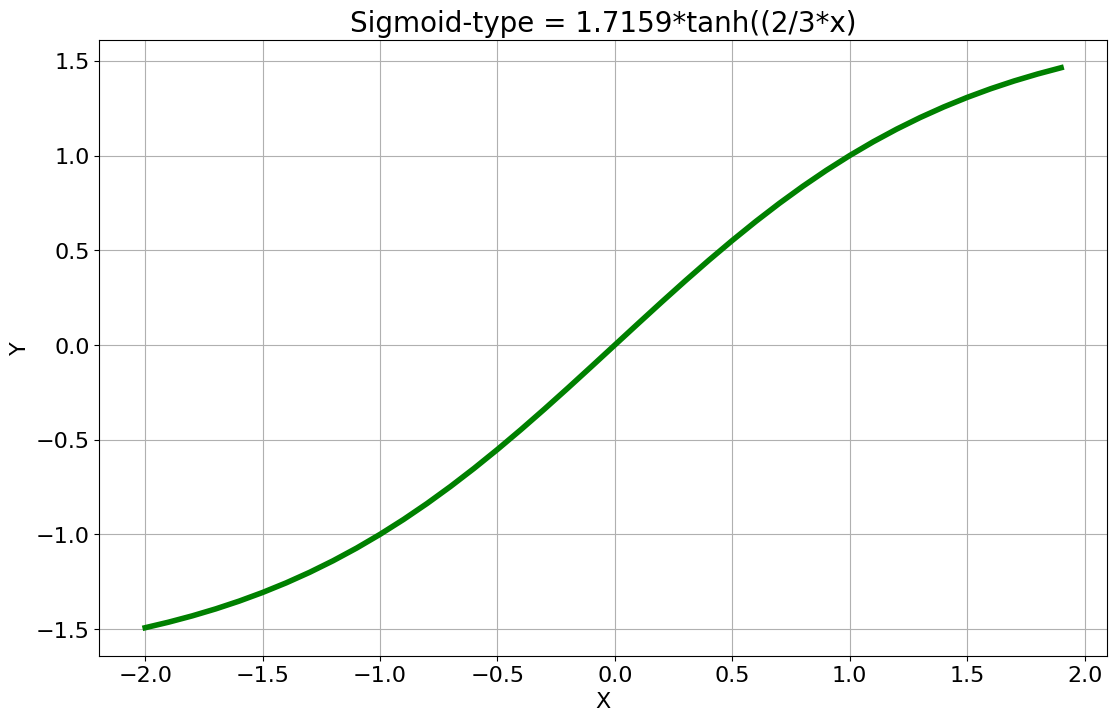

In [187]:
#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)
x_ = np.arange(-2, 2.0, 0.1)
y_ = 1.7159*tanh((2/3*x_))

#Samples and function F are plotted
plt.figure(figsize=(13,8))
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y', fontsize=16)
plt.xlabel('X', fontsize=16)
plt.grid(True)
plt.title('Sigmoid-type = 1.7159*tanh((2/3*x)', size=20)

#Plotting function
plt.plot(x_, y_, color='green', lw=4)

plt.show()

## Sistema de aprendizaje que relaciona las variables X y Y

Se tienen $m$ muestras.
    
Para una muestra $j \in m$ $x^{(j)}$:

$$z^{(j)} = w^T x^{(j)} + b $$

$z^{(j)}$ es la combinacion lineal entre los pesos ($w$) y la muestra $x^{(j)}$ + el bias b. Posteriormente esta sumatoria es transformada, para generar el valor de salida $a^{(j)}$, mediante una función. En el presente caso la función es del tipo sigmoide (*tanh*), porque la relación es ligeramente no-lineal.

$$ a^{(j)} = tanh(z^{(j)})$$

La funcion de perdida (*loss*), tambien llamada costo *cost*, $\textbf {J}$, es el promedio, sobre todas las muestras, de la diferencia al cuadrado entre el valor medido ($y^{(j)}$) y el valor que predice la funcion de activacion ($a^{(j)}$).  

$$ J = \frac{1}{m} \sum_{j=1}^m (a^{(j)} - y^{(j)})^2$$




En lugar de emplear la función $f(z^{(j)})=tanh(z^{(j)})$ para la activación, empleamos la función

$$ f(z^{(j)}) = 1.7159*tanh(2*z^{(j)}/3) $$

[Activation-function](./Literatura/Efficient-backprop_Lecun_1998.pdf)$$ $$
Con ello, la varianza es cercana a 1, el valor de la función es ligeramente no lineal entre -1 y +1, y la derivada es máxima para $z^{(j)} = 1$
$$ $$
Con esto, la función de costo, $J$ está dada por:

$$ J = \dfrac{1}{m}\sum_{i=0}^{m}(1.7159*tanh(2*z^{(j)}/3)-y^{(j)})^2 $$

## Se inicializan las variables del sistema de aprendizaje que define la relación entre X y Y.

In [188]:
def initialize_params_1(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    w = np.reshape(np.random.uniform(-0.1, 0.1, dim), (dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

In [189]:
def atanh(x):
    return 1.7159*tanh(2*x/3)

In [190]:
def d_atanh(z):
    return 1.7159*(1-np.square(atanh(z)))*(2/3)

In [191]:
# Probando el código

dim = train_x.shape[0]
w, b = initialize_params(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.09327038]
 [-0.08875774]
 [-0.04105418]
 [-0.00732795]
 [-0.05191162]
 [-0.02070941]
 [ 0.07037133]
 [ 0.08511158]
 [-0.09446139]
 [ 0.01767838]]
b = 0


In [173]:
def propagate_1(w, b, X, Y, X_val, Y_val):

    m = X.shape[1]
    m_val = X.shape[1]

    A = atanh(np.dot(w.T, X)+b)
    A_val = atanh(np.dot(w.T,X_val)+b)

    cost = (1/m)*np.sum((Y-A)**2)
    cost_val = (1/m_val)*np.sum((Y_val-A_val)**2)

    dA = A-Y
    dZ = d_atanh(np.dot(w.T, X)+b)

    dw = (1/m)*np.dot(dA, (dZ*X).T).T
    db = (1/m)*np.sum((A-Y)*(1-np.power(A, 2)), axis=1, keepdims=True)


    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost, cost_val

In [174]:
x1_val = np.array([[1.,2.,-2.],[2.,4.,-3.2]])
y1_val = np.array([[1,0,2]])

w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost, cost_val = propagate_1(w, b, X, Y,x1_val, y1_val)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))


dw = [[ -5.07757178]
 [-13.08893287]]
db = [[0.17455838]]
cost = 3.6063356189939464


    
La función *optimize_1(  )*  actualiza los pesos $w$ y el bias $b$ usando el método de gradiente descendente.

Se calcula la función de costo para las muestras empleadas en el entrenamiento y para las asignadas a la validación.
    
Los pesos $ w $ y el bias $ b $ son modificados en cada época hasta que la función de costo $ J $ llega a su valor mínimo.

Los pesos $ w_{i} $ y el bias $b$ se actualizan mediante la siguientes relaciones: $$ $$ $$ w_{i} := w_{i} - \alpha \frac{\partial J}{\partial w_{i}} $$

$$ b := b - \alpha \frac{\partial J}{\partial b} $$ $$ $$ $ \alpha $ es el hyperparámetro que define la relación de aprendizaje.

In [176]:
def optimize_1(w, b, X, Y, X_val, Y_val, epochs, learning_rate, print_cost = False):

    costs = []
    costs_val = []

    for i in range(epochs):

        grads, cost, cost_val = propagate_1(w, b, X, Y, X_val, Y_val)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update parameters
        w = w-learning_rate*dw
        b = b-learning_rate*db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
            costs_val.append(cost_val)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost and Cost_val after iteration %i: %f %f" %(i, cost, cost_val))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs, costs_val

In [177]:
epochs = 100
params, grads, costs, costs_val = optimize_1(w, b, X, Y, x1_val, y1_val, epochs=epochs, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 5.57950249]
 [13.81103216]]
b = [[1.83448553]]
dw = [[ -5.08859121]
 [-13.12418521]]
db = [[0.18412642]]


Una vez que se encuentran los valores de los pesos 𝑤 y del bias 𝑏 que minimizan la función de costo, la función, 𝐹(𝑋) que se genera con estos valores se emplea para inferir valores de Y asociados a las muestras de prueba, los cuales se comparan con los valores Y conocidos de estas muestras.
$$ $$

    
La función *predic()_1* calcula $𝐹(𝑋)$ empleando los valores de 𝑤 y 𝑏
para los cuales el costo es mínimo.



In [178]:
def predict_1(w, b, X):

    #m = X.shape[1]
    #Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    #A = sigmoid(np.dot(w.T, X)+b)
    A = atanh(np.dot(w.T, X)+b)

    return A

In [179]:
w = np.array([[0.1124579],[0.23106775]])
b = 0.0
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict_1(w, b, X)))

predictions = [[ 0.43606665  0.38070532 -0.37888495]]


Para estructurar el sistema de aprendizaje, se juntan todos las funciones implementadas en las partes anteriores, en el orden correcto.


In [181]:
def model_1(X_train, Y_train, val_ratio, epochs = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    epochs -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    train_ratio = int((1-val_ratio)*X_train.shape[1])
    X_val = X_train[:,train_ratio:]
    Y_val = Y_train[:,train_ratio:]

    X_train = X_train[:,:train_ratio]
    Y_train = Y_train[:,:train_ratio]

    print("Train",X_train.shape,Y_train.shape)
    print("val",X_val.shape,Y_val.shape)


    # initialize parameters
    w, b = initialize_params_1(X_train.shape[0])

    # Gradient descent
    parameters, grads, costs, costs_val = optimize_1(w, b, X_train, Y_train, X_val, Y_val, epochs, learning_rate, print_cost = print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    print(w.shape)

    # Predict test/train set examples
    Y_prediction_val = predict_1(w, b, X_val)
    Y_prediction_train = predict_1(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_train - Y_train, 2)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.power(Y_prediction_val - Y_val, 2)) * 100))


    d = {"costs": costs,"costs_val": costs_val,
         "Y_prediction_val": Y_prediction_val,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": epochs}

    return d

In [182]:

epochs = 1000
learning_rate = 0.005
val_ratio = 0.1

d = model_1(train_x, train_y.T, val_ratio=val_ratio, epochs = epochs,
          learning_rate = learning_rate, print_cost = True)

Train (10, 317) (1, 317)
val (10, 36) (1, 36)
Cost and Cost_val after iteration 0: 0.851406 0.102639
Cost and Cost_val after iteration 100: 0.611953 0.060496
Cost and Cost_val after iteration 200: 0.562970 0.052425
Cost and Cost_val after iteration 300: 0.545989 0.049678
Cost and Cost_val after iteration 400: 0.538684 0.048457
Cost and Cost_val after iteration 500: 0.535055 0.047815
Cost and Cost_val after iteration 600: 0.533072 0.047440
Cost and Cost_val after iteration 700: 0.531917 0.047206
Cost and Cost_val after iteration 800: 0.531219 0.047053
Cost and Cost_val after iteration 900: 0.530789 0.046949
(10, 1)
train accuracy: 46.94738763955303 %
test accuracy: 58.722939040344734 %


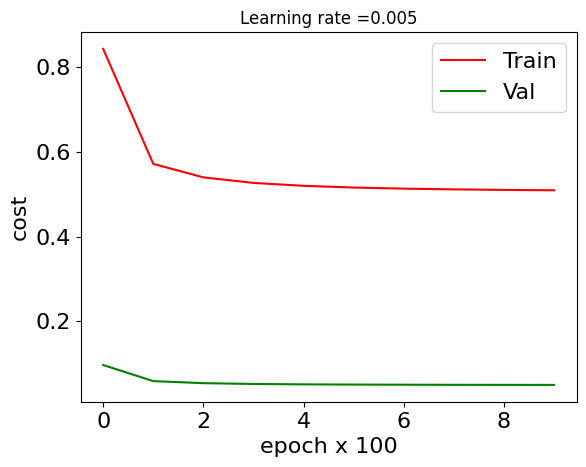

In [108]:
costs = np.squeeze(d['costs'])
costs_val = np.squeeze(d['costs_val'])

plt.plot(costs, color='red')
plt.plot(costs_val, color='green')
plt.ylabel('cost', size=16)
plt.xlabel('epoch x 100', size=16)
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

learning rate is:  0.005
Train (10, 317) (1, 317)
val (10, 36) (1, 36)
(10, 1)
train accuracy: 49.07763059526684 %
test accuracy: 56.30720115662068 %

-------------------------------------------------------

learning rate is:  0.003
Train (10, 317) (1, 317)
val (10, 36) (1, 36)
(10, 1)
train accuracy: 48.58191678697118 %
test accuracy: 56.63600617038455 %

-------------------------------------------------------

learning rate is:  0.001
Train (10, 317) (1, 317)
val (10, 36) (1, 36)
(10, 1)
train accuracy: 44.36702691221163 %
test accuracy: 54.413649187645454 %

-------------------------------------------------------



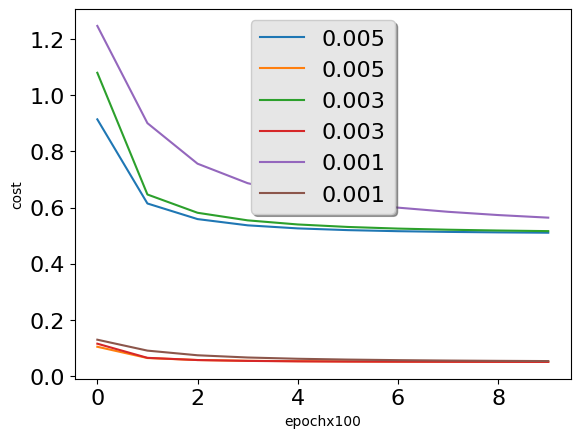

In [109]:
learning_rates = [0.005, 0.003, 0.001]
val_ratio = 0.1
models = {}
for i in learning_rates:
    print ("learning rate is: ", i)
    models[str(i)] = model_1(train_x, train_y.T, val_ratio=val_ratio, epochs = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))
    plt.plot(np.squeeze(models[str(i)]["costs_val"]), label= str(models[str(i)]["learning_rate"]))
plt.ylabel('cost')
plt.xlabel('epochx100')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

# Artificial Neural Networks

Inspirandose en modelos que intentan describir las conecciones entre las neuronas en nuestro cerebro, se propusieron (y se siguen proponiendo) modelos de redes neuronales para generar sistemas de aprendizaje. Se les conoce con el nombre de redes neuronales artificiales, o simplemente como redes neuronales.

## Implementación de una red neuronal del tipo "Full Feed-forward (FFF)".


<p>En nuestro primer modelo, la red neuronal tiene 3 capas: la capa de entrada, la capa de salida y una capa interior (en la literatura, a esta capa interna se le da el nombre de capa oculta). </p>
<p>El objetivo del modelo es encontrar una función que describa la evolución de la Diabetes Mellitus en una año, a partir de su linea base, con los rasgos de la persona que se consideran importantes para su evolución. Los rasgos propuestos son: edad, sexo, índice de masa corporal, presión arterial promedio y las seis mediciones de suero sanguíneo descritas al inicio: el colesterol total, la densidad baja de lipoproteinas, la densidad alta de lipoproteinas, los trigliceridos, la concentración de lamorigina y la glucosa</p>
<p>Esta función se genera mediante una red de neuronas artificiales. Se entiende como neurona un modelo matemático simple de una neurona biológica.</p>


## Adecuando lo datos de alimentación al sistema de aprendizaje

Antes de inciar el desarrollo del sistema, transformamos los datos de entrada para que sean compatibles con el modelo que desarrollaremos. El fomato de entrada de las variables X y Y, tanto para el entrenamiento como para la prueba es un poco diferente al empleado en los sistemas de aprendizaje anteriores.

In [110]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(10, 353)
(353, 1)
(10, 89)
(89, 1)


In [111]:
train_y = train_y.T
test_y = test_y.T

In [112]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(10, 353)
(1, 353)
(10, 89)
(1, 89)


Definición de la arquitectura de la red neuronal.

Se emplea indistintamente la palabra neurona o nodo para referirse al modelo matematico de la neurona.

El número de nodos en la capa de entrada depende del numero de rasgos del sistema que definen la variable objetivo, la evolución de la diabetes en un año. En el presente caso el número de rasgos es diez.

El número de nodos en la capa de salida depende del tipo de problema. En el presente caso, se tiene una sola neurona, cuya salida nos da un número que cuantifica la evolución de la diabetes en un año.

En el presente modelo, sólo tenemos una capa interna, el número de nodos en ella es variable. Se hacen pruebas con diferentes números y se adopta el que de los mejores resultados.

La función layer_sizes() genera la arquitectura de la red neuronal partiendo de los datos con que se van a alimentar a la red.


In [200]:
def layer_sizes(X, Y, n_h):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)

    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """

    n_x = X.shape[0]

    n_h = n_h

    n_y = Y.shape[1]

    return (n_x, n_h, n_y)

In [201]:
train_y.shape

(353, 1)

In [202]:
n_h = 4
n_x, n_h, n_y = layer_sizes(train_x, train_y, n_h = n_h)

In [203]:
print(n_x, n_h, n_y)

10 4 1


# Network Visualization     


Utilizaremos NetworkX, que es un paquete de Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas.

In [195]:
import networkx as nx

class Network(object):

    def  __init__ (self,sizes):
        self.num_layers = len(sizes)
        print("It has", self.num_layers, "layers,")
        self.sizes = sizes
        print("with the following number of nodes per layer",self.sizes)
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, x_of_sample):
        """Return the output of the network F(x_of_sample) """
        for b, w in zip(self.biases, self.weights):
            x_of_sample = sigmoid(np.dot(w, x_of_sample)+b)
        return x_of_sample

    def graph(self,sizes):
        a=[]
        ps={}
        Q = nx.Graph()
        for i in range(len(sizes)):
            Qi=nx.Graph()
            n=sizes[i]
            nodos=np.arange(n)
            Qi.add_nodes_from(nodos)
            l_i=Qi.nodes
            Q = nx.union(Q, Qi, rename = (None, 'Q%i-'%i))
            if len(l_i)==1:
                ps['Q%i-0'%i]=[i/(len(sizes)), 1/2]
            else:
                for j in range(len(l_i)+1):
                    ps['Q%i-%i'%(i,j)]=[i/(len(sizes)),(1/(len(l_i)*len(l_i)))+(j/(len(l_i)))]
            a.insert(i,Qi)
        for i in range(len(a)-1):
            for j in range(len(a[i])):
                for k in range(len(a[i+1])):
                    Q.add_edge('Q%i-%i' %(i,j),'Q%i-%i' %(i+1,k))
        nx.draw(Q, pos = ps)


It has 3 layers,
with the following number of nodes per layer [10, 4, 1]


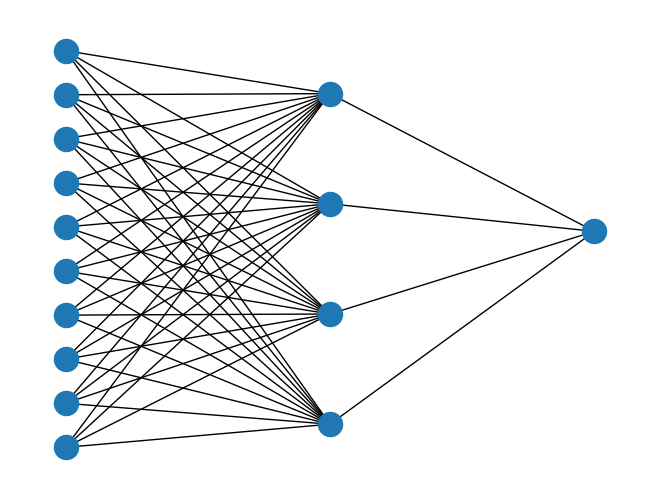

In [204]:
layers = [n_x, n_h, n_y]
net = Network(layers)
net.graph(layers)